# Lung Cancer Prediction

Problem Statement: What Causes Lung Cancer and how should it be treated 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Here we will be experimenting with 3 algorithms 
1. KNeighborsClassifier
2. DecisionTreeClassifier
3. RandomForestClassifier


In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
df = pd.read_excel('cancer_patient_data_sets.xlsx')

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient Id                1000 non-null   object
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   int64 
 3   Air Pollution             1000 non-null   int64 
 4   Alcohol use               1000 non-null   int64 
 5   Dust Allergy              1000 non-null   int64 
 6   OccuPational Hazards      1000 non-null   int64 
 7   Genetic Risk              1000 non-null   int64 
 8   chronic Lung Disease      1000 non-null   int64 
 9   Balanced Diet             1000 non-null   int64 
 10  Obesity                   1000 non-null   int64 
 11  Smoking                   1000 non-null   int64 
 12  Passive Smoker            1000 non-null   int64 
 13  Chest Pain                1000 non-null   int64 
 14  Coughing of Blood        

In [6]:
df['Level'] = df['Level'].str.strip().str.lower()
df['Level'] = df['Level'].replace({'low': 0, 'medium': 1, 'high': 2})




In [7]:
df['Level']

0      0
1      1
2      2
3      2
4      2
      ..
995    2
996    2
997    2
998    2
999    2
Name: Level, Length: 1000, dtype: int64

In [8]:
df.head()


,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,0
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,1
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,2
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,2
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,2


In [9]:
df = df.drop('Patient Id' , axis = 1)

## Feature Selection

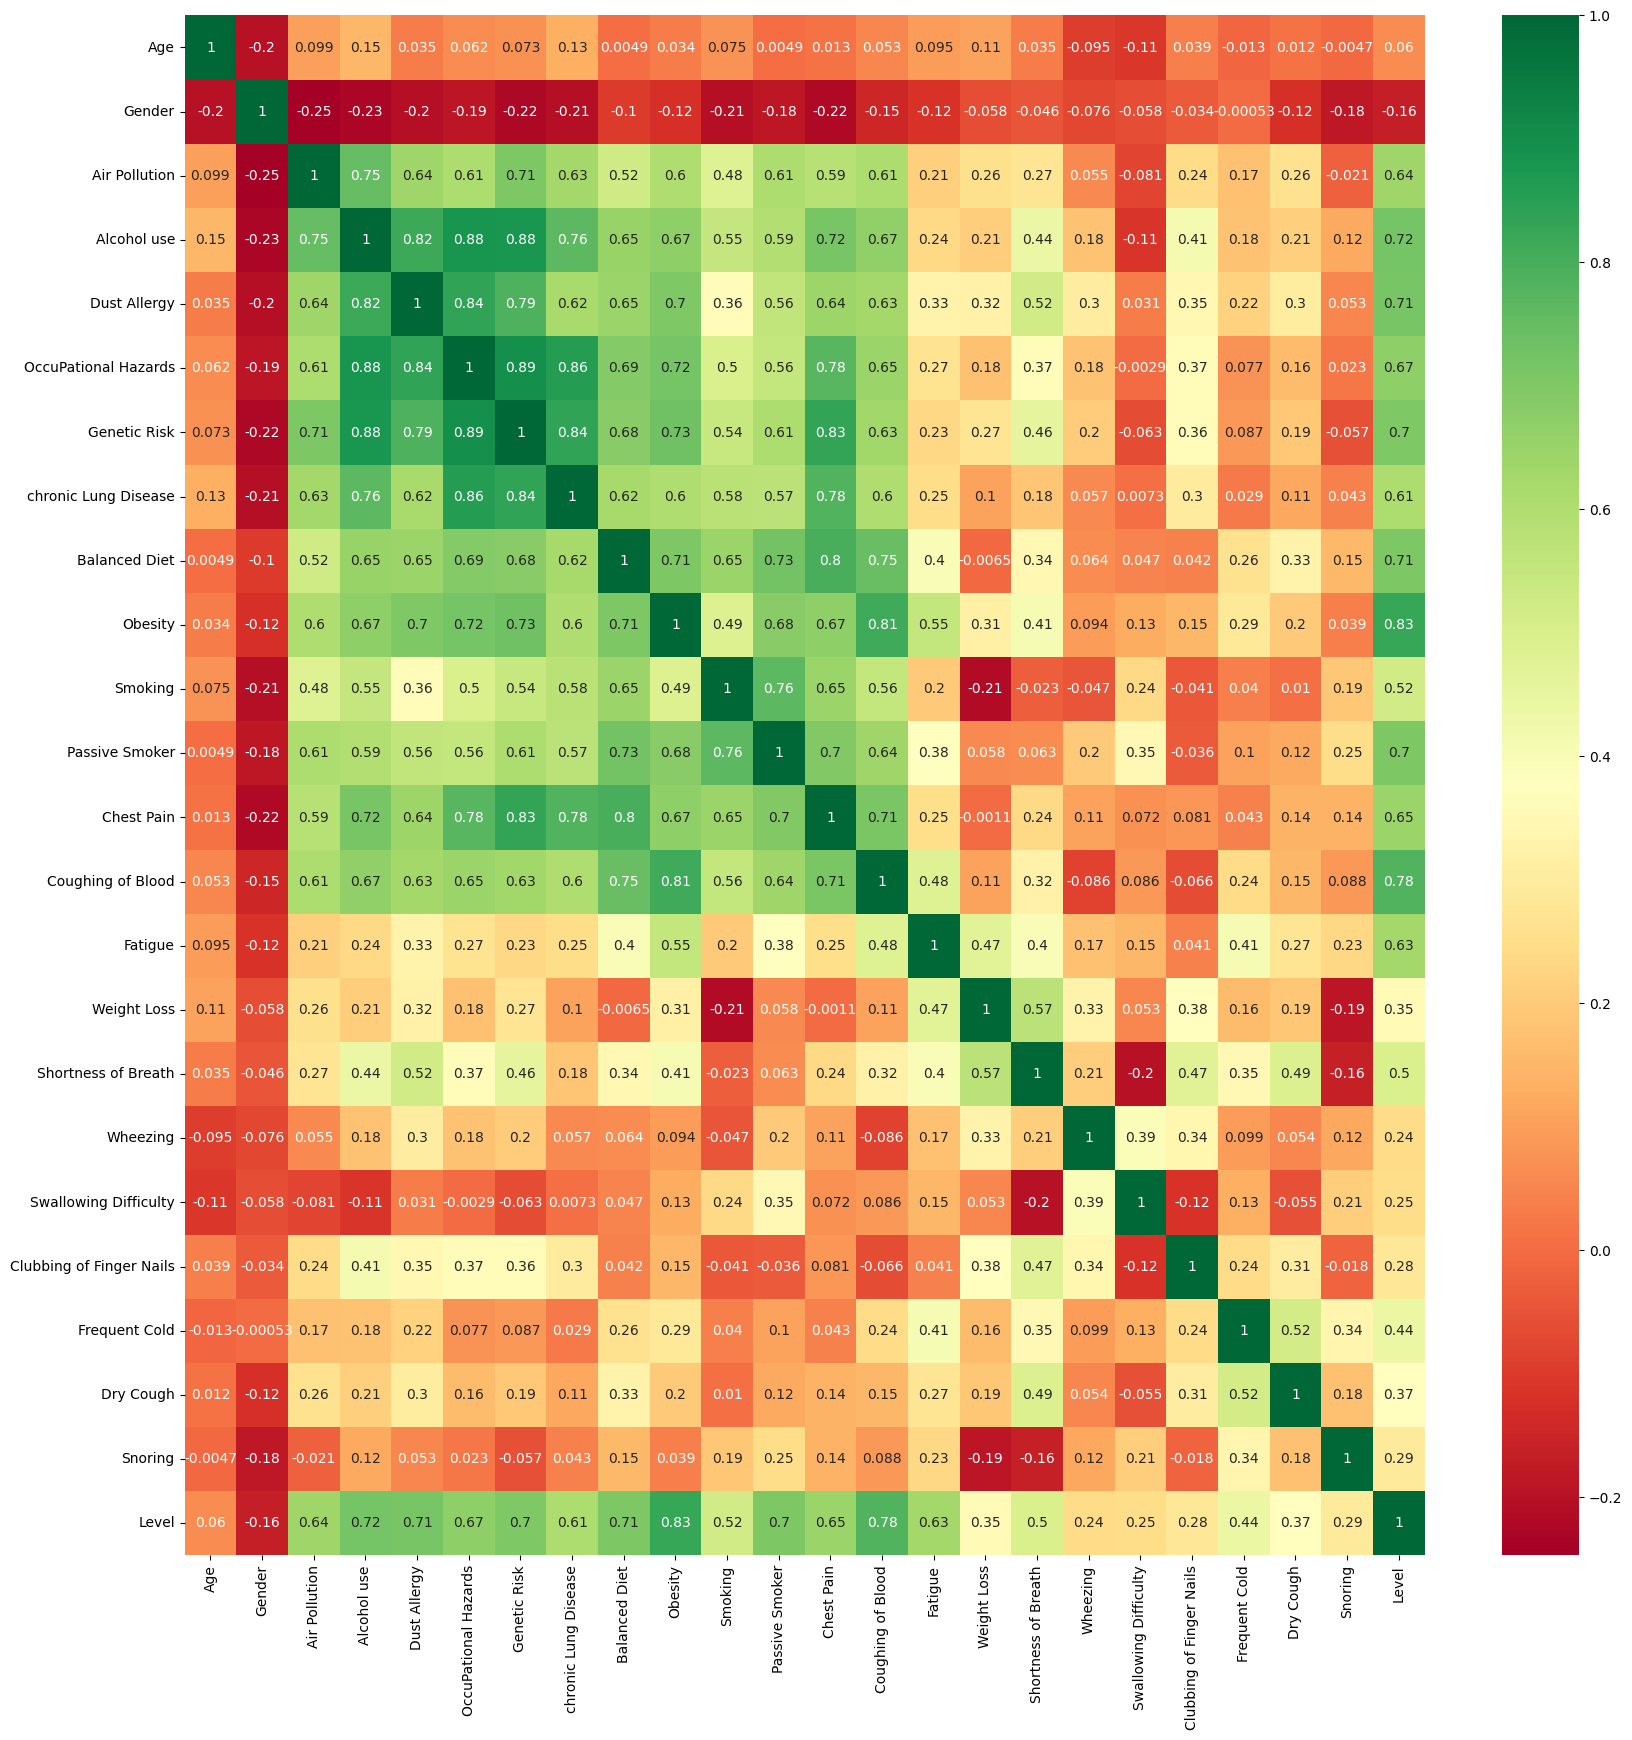

In [10]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")


Genetic Risk has high correlation with
chronic Lung Disease (0.88)
Smoking (73%)
Obesity (52%)
Air Pollution (64%)

chronic Lung Disease also correlates highly with:

Smoking (76%)
Passive Smoker (71%)
Alcohol use (62%)


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Air Pollution'}>,
        <Axes: title={'center': 'Alcohol use'}>,
        <Axes: title={'center': 'Dust Allergy'}>],
       [<Axes: title={'center': 'OccuPational Hazards'}>,
        <Axes: title={'center': 'Genetic Risk'}>,
        <Axes: title={'center': 'chronic Lung Disease'}>,
        <Axes: title={'center': 'Balanced Diet'}>,
        <Axes: title={'center': 'Obesity'}>],
       [<Axes: title={'center': 'Smoking'}>,
        <Axes: title={'center': 'Passive Smoker'}>,
        <Axes: title={'center': 'Chest Pain'}>,
        <Axes: title={'center': 'Coughing of Blood'}>,
        <Axes: title={'center': 'Fatigue'}>],
       [<Axes: title={'center': 'Weight Loss'}>,
        <Axes: title={'center': 'Shortness of Breath'}>,
        <Axes: title={'center': 'Wheezing'}>,
        <Axes: title={'center': 'Swallowing Difficulty'}>,
        <Axes: title={'center': 'Clubbing of

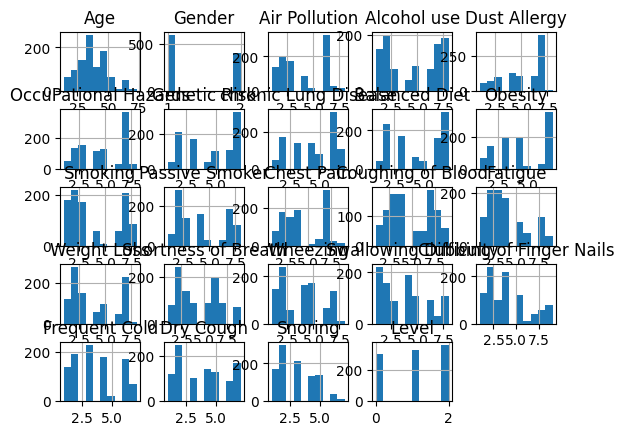

In [11]:
df.hist()

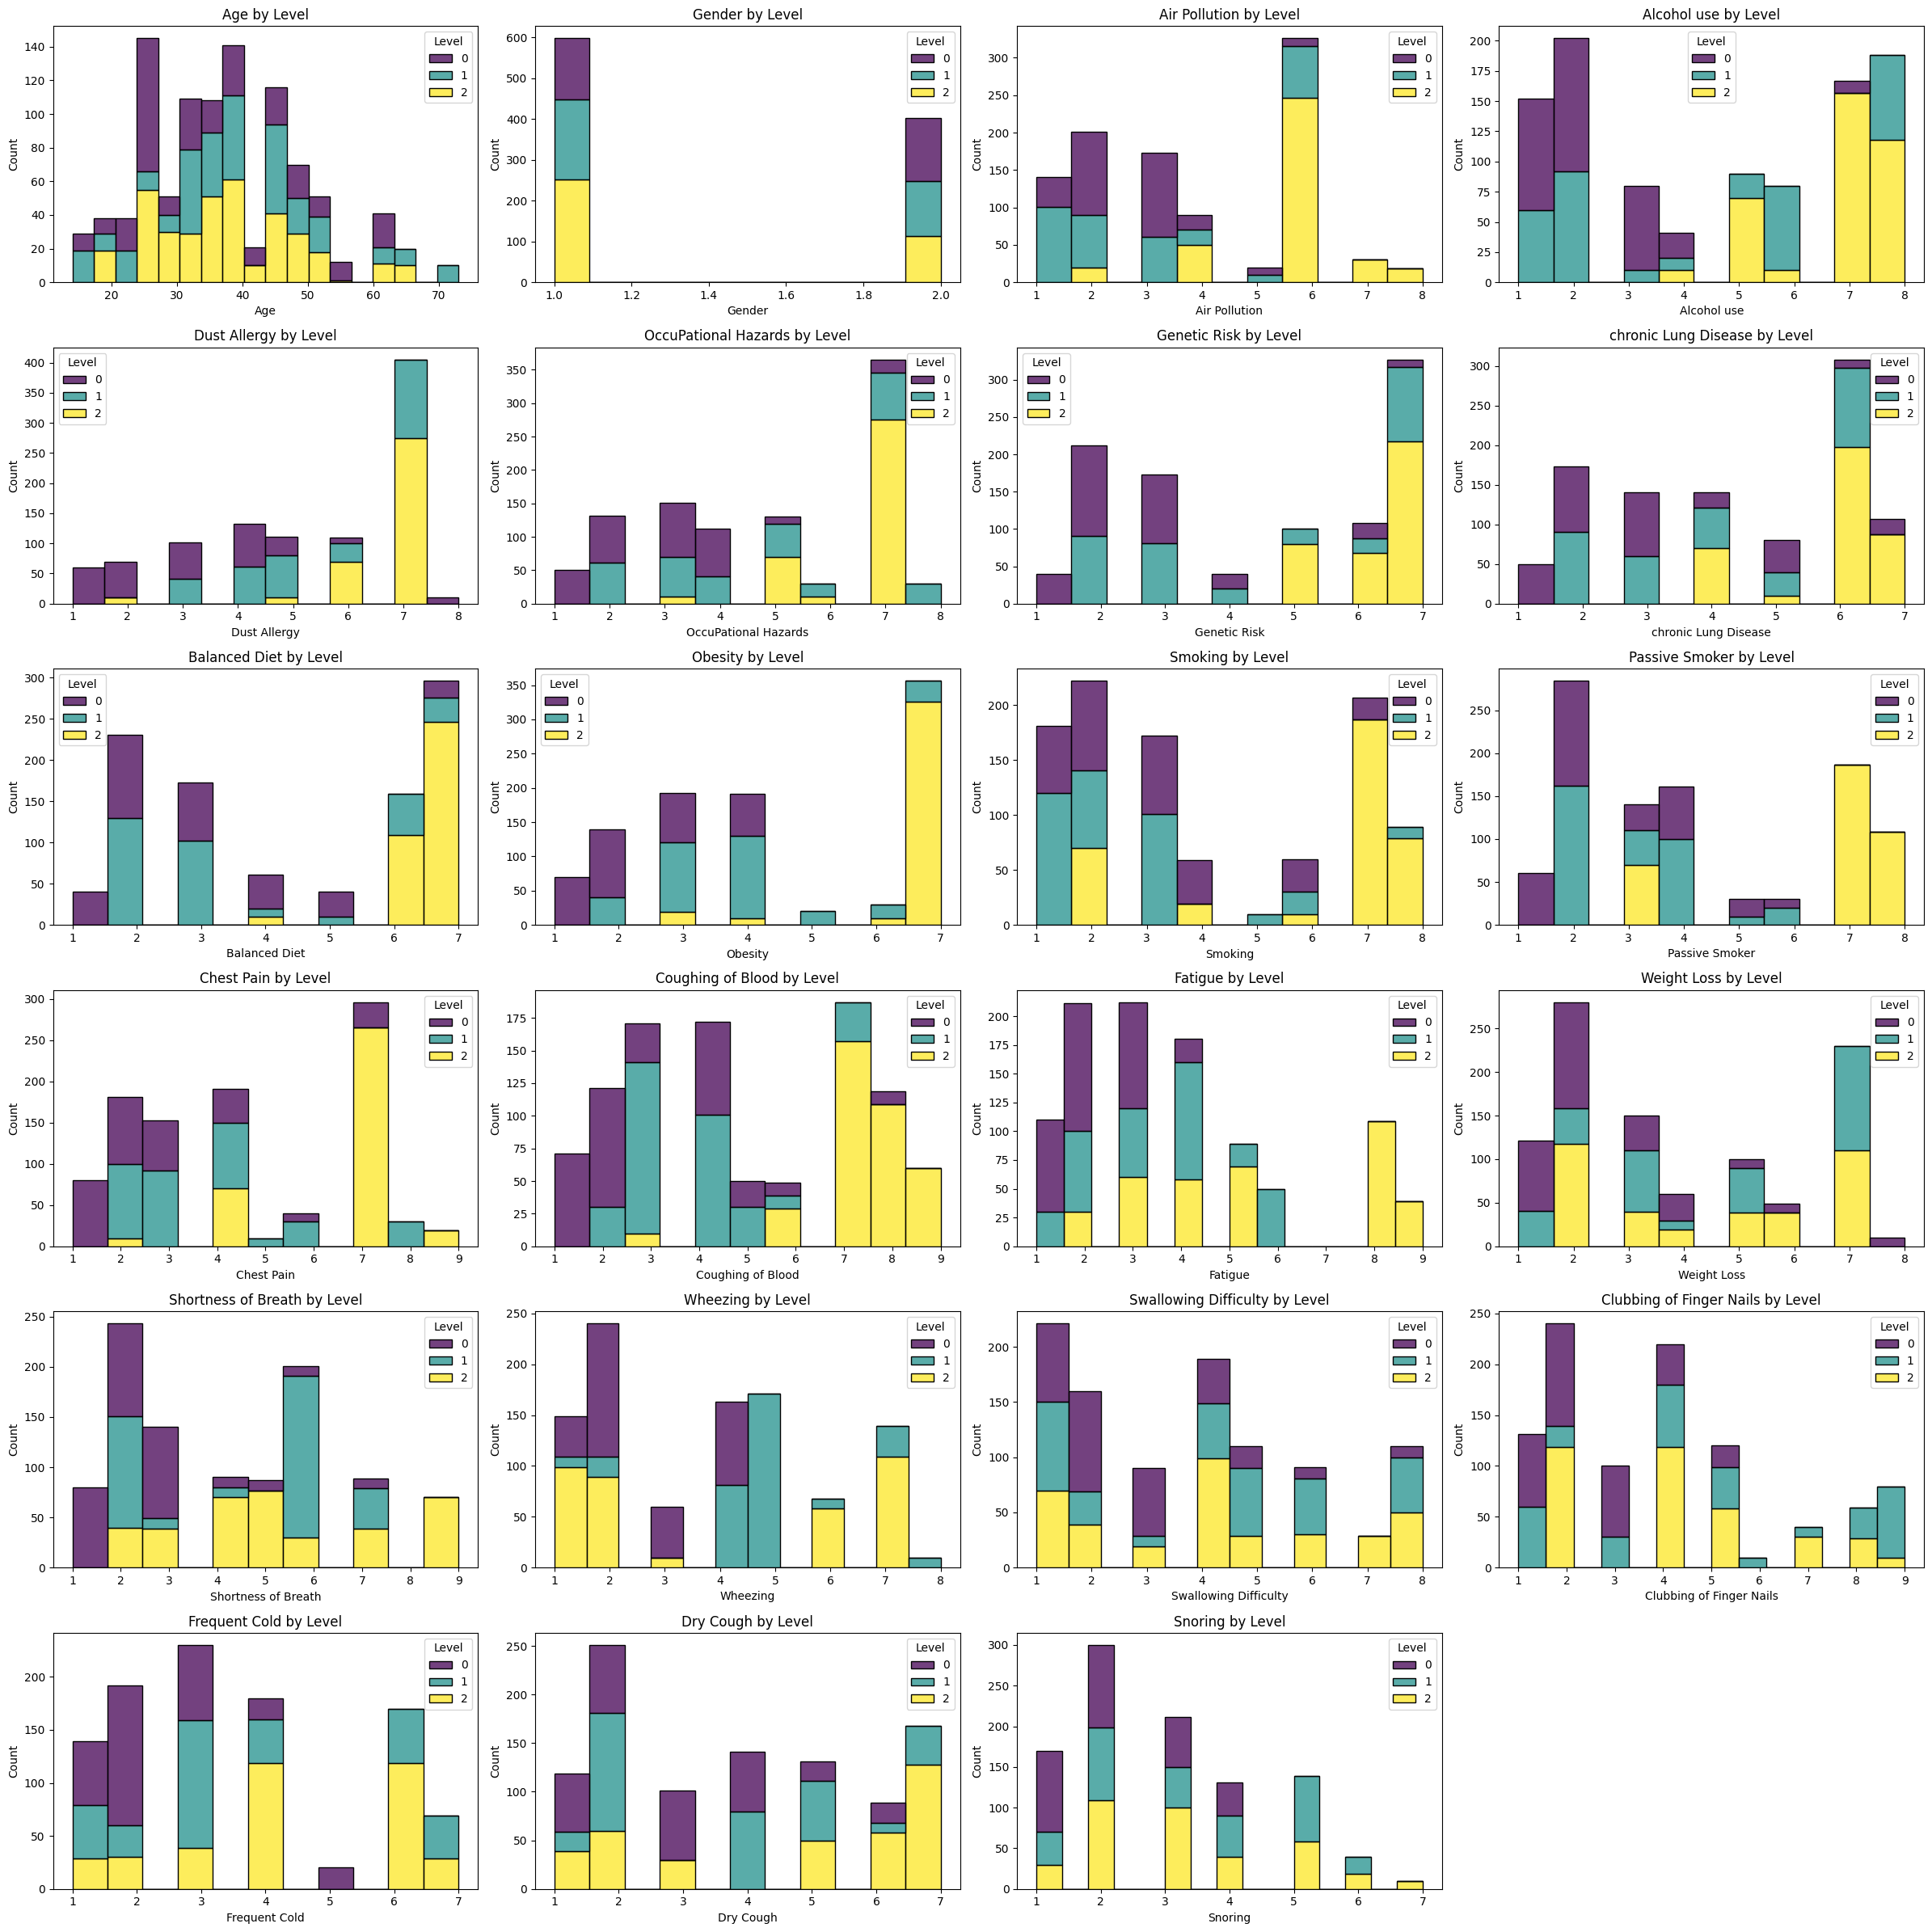

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numeric or unrelated columns if needed
features = df.columns.drop('Level')  # Assuming 'Level' is the target
num_cols = 4
num_rows = -(-len(features) // num_cols)  # Ceiling division

plt.figure(figsize=(24, num_rows * 4))

for i, col in enumerate(features):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(data=df, x=col, hue='Level', multiple='stack', palette='viridis')
    plt.title(f'{col} by Level')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


Plotted a Histogram where levels(low,medium,high) with each feature 
and count at the Y axis

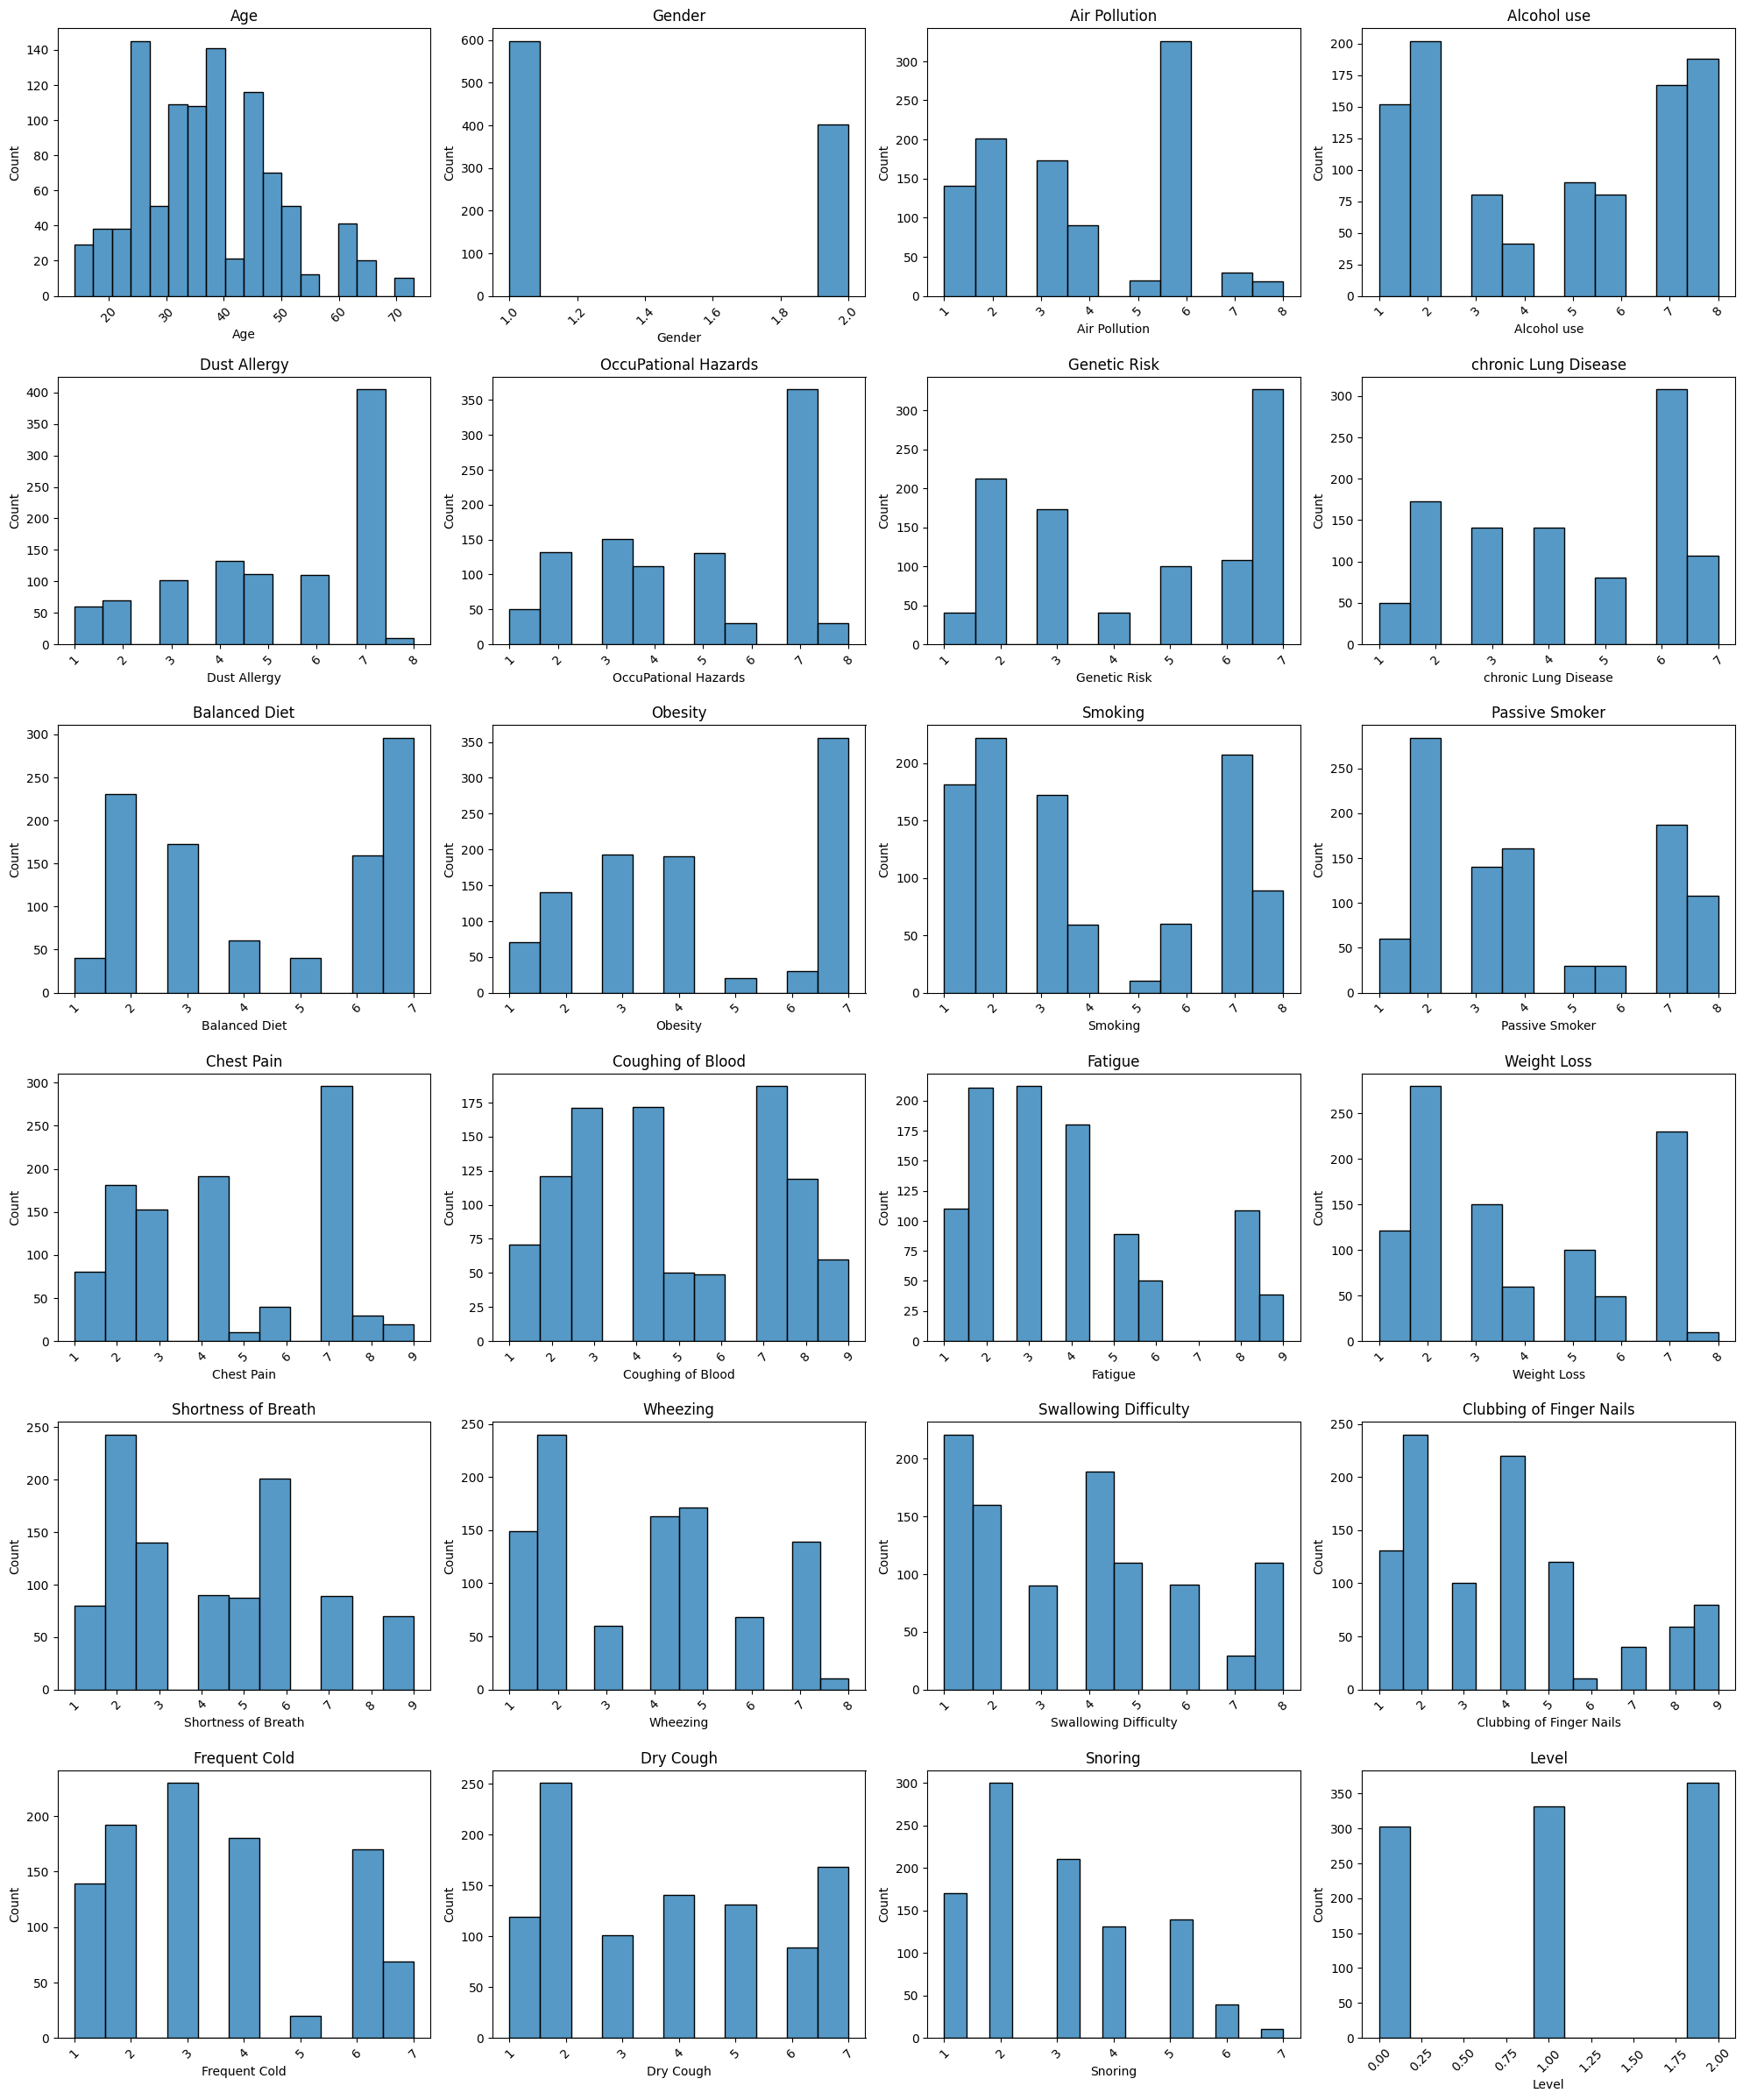

In [13]:
columns = df.columns
cols = 4  
rows = -(-len(columns) // cols)  # Ceiling division

fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 4))  
axes = axes.flatten()

for i, col in enumerate(columns):
    sns.histplot(data=df, x=col, ax=axes[i], kde=False)
    axes[i].set_title(col, fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()


<Axes: xlabel='Level', ylabel='count'>

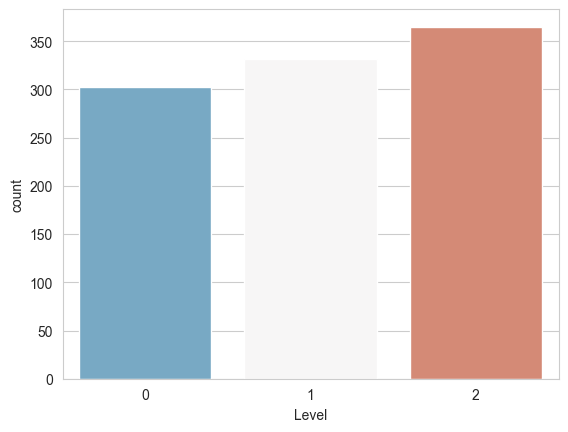

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='Level' , data=df, palette='RdBu_r')

In [15]:
df.head()


,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,0
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,1
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,2
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2


Importing train test split to separate the training data and the test data 


Importing train test split and using 70% for training and 30% for testing


In [27]:

X= df.drop(['Level'], axis=1)
y= df['Level']





Importing train test Split where 30% data is for testing and 70% for training

In [17]:
from sklearn.model_selection import train_test_split

# Assuming X is your feature matrix and y is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [28]:
X.shape

(1000, 23)

In [29]:
y.shape

(1000,)

In [30]:
from sklearn.model_selection import train_test_split

# Assuming X is your feature matrix and y is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [31]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

# Check the shape of X_test and y_test
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (700, 23)
Shape of y_train: (700,)
Shape of X_test: (300, 23)
Shape of y_test: (300,)


I have implemented few Machine Learning Models to check which gives highest Score 

In [39]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report



models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
     
}

# === Model evaluation ===
results = []

for name, model in models.items():
    print(f"Training: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    precision = precision_score(y_test, y_pred, average='macro')

    results.append({
        'Model': name,
        'Accuracy': acc,
        'F1-score': f1,
        'Recall': recall,
        'Precision': precision
    })

# === Final results as DataFrame sorted by Accuracy ===
results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)
results_df

Training: Logistic Regression
Training: Random Forest
Training: Decision Tree
Training: KNN
Training: Gradient Boosting


,Model,Accuracy,F1-score,Recall,Precision
0,Logistic Regression,1.000000,1.000000,1.000000,1.000000
1,Random Forest,1.000000,1.000000,1.000000,1.000000
2,Decision Tree,1.000000,1.000000,1.000000,1.000000
4,Gradient Boosting,1.000000,1.000000,1.000000,1.000000
3,KNN,0.996667,0.996295,0.996032,0.996599


Applying Cross Validation to see how well our Machine model will generalise the unseen data 


I have taken Cross Validation as 3

Best k: 1
Best cross-validation score: 0.9990


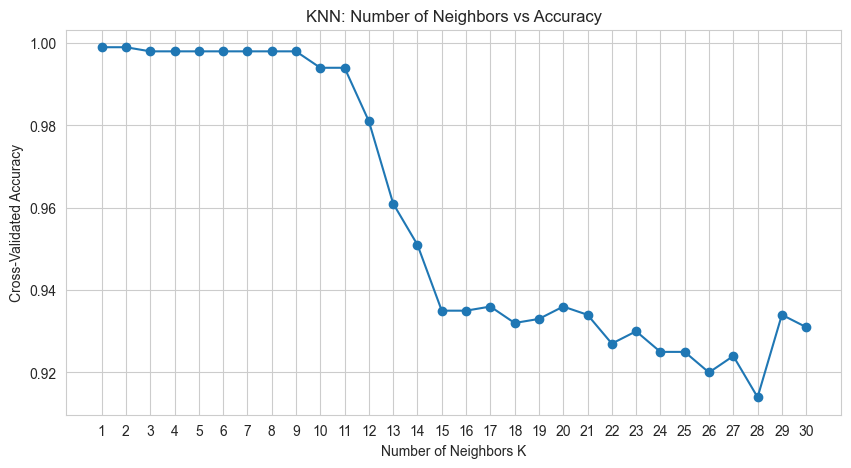

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Store cross-validation scores for each k
knn_scores = []

# Try k values from 1 to 30
for k in range(1, 31):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_classifier, X, y, cv=3)
    knn_scores.append(scores.mean())

# Find the best k
best_k = knn_scores.index(max(knn_scores)) + 1  # +1 because range starts at 1

print(f"Best k: {best_k}")
print(f"Best cross-validation score: {max(knn_scores):.4f}")

# Optional: Plotting k vs CV accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(1, 31), knn_scores, marker='o')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Cross-Validated Accuracy')
plt.title('KNN: Number of Neighbors vs Accuracy')
plt.xticks(range(1, 31))
plt.grid(True)
plt.show()


By performing Cross Validation It has given n_neighbours value which I have used in the above Code


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


y= df['Level']
X= df.drop(['Level'], axis=1)

# 2. Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Initialize and train KNN classifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# 4. Predict on test set here test (Levels)
y_pred = knn.predict(X_test)

# EVALUATION 
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # 'macro' works for multiclass
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Optional: detailed report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00        97
           2       1.00      1.00      1.00       119

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



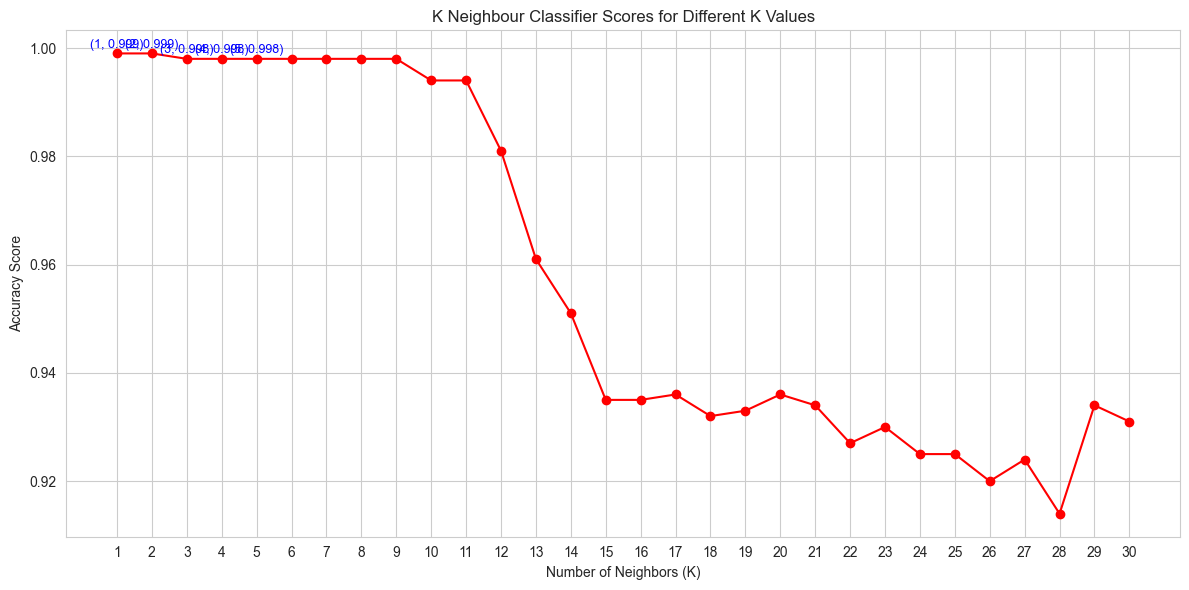

In [41]:

plt.figure(figsize=(12, 6)) 

# Plot the KNN scores
plt.plot(range(1, 31), knn_scores, color='red', marker='o', linestyle='-')

# taking 5 points to reduce clutter 
top_k = sorted(enumerate(knn_scores, start=1), key=lambda x: x[1], reverse=True)[:5]
for k, score in top_k:
    plt.text(k, score + 0.001, f'({k}, {score:.3f})', ha='center', fontsize=9, color='blue')


plt.xticks(range(1, 31))
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy Score')
plt.title('K Neighbour Classifier Scores for Different K Values')
plt.grid(True)
plt.tight_layout()
plt.show()


Decision Tree classifier 

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

decision_tree_classifier = DecisionTreeClassifier()  # No n_estimators here
score = cross_val_score(decision_tree_classifier, X, y, cv=5)
print("Cross-validation score:", score.mean())


Cross-validation score: 1.0


In [23]:
score.mean()

np.float64(1.0)